# Support vector machine model using title data vectorized with word2vec

In [8]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [9]:
#import data

%store -r x_title_train_wv_2d
%store -r x_title_test_wv_2d
%store -r y_title_train_wv
%store -r y_title_test_wv


In [10]:
#rename variables for ease of use

x_train =  x_title_train_wv_2d
x_test =  x_title_test_wv_2d
y_train = y_title_train_wv
y_test = y_title_test_wv

In [11]:
#define model

svm = SVC()

In [18]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [19]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [20]:
#cross validate on training set to check model stability

cv_scores_w2v_title_svm = cross_validate(svm, x_train, y_train, cv = k_folds, scoring=scorer)

In [21]:
#check cross validation scores

cv_scores_w2v_title_svm

{'fit_time': array([252.99780154, 246.9021349 , 237.71111155, 213.71644711,
        211.2157073 ]),
 'score_time': array([40.32056284, 42.99306536, 36.57921553, 42.4824512 , 29.98916984]),
 'test_accuracy': array([0.85947792, 0.86350329, 0.85470294, 0.85128706, 0.85421496]),
 'test_precision': array([0.84465219, 0.84842575, 0.83795014, 0.83565764, 0.83250689]),
 'test_recall': array([0.83957365, 0.84116022, 0.83310383, 0.83179096, 0.83735107]),
 'test_f1_score': array([0.84210526, 0.84477736, 0.83551996, 0.83371982, 0.83492195])}

In [22]:
#fit model on the whole training set
start = process_time()

svm.fit(x_train, y_train)

end=process_time()

In [23]:
#test model on test set

y_pred = svm.predict(x_test)

In [24]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      9765
           1       0.85      0.85      0.85      7802

    accuracy                           0.86     17567
   macro avg       0.86      0.86      0.86     17567
weighted avg       0.86      0.86      0.86     17567



In [25]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'SVM model with Title Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

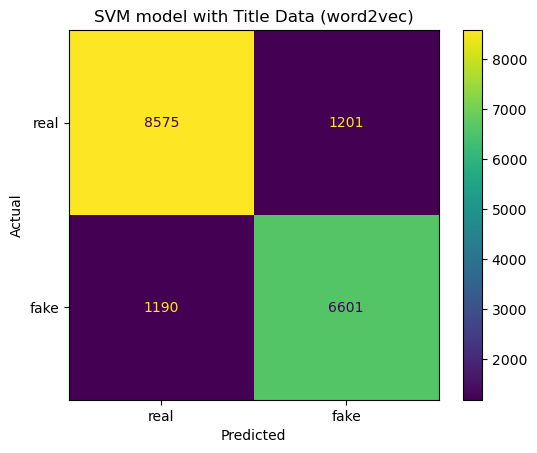

In [26]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='SVM model with Title Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [27]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [28]:
dict = {'data type': 'title',
        'model type':'SVM',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [29]:
w2v_title_SVM=pd.DataFrame.from_dict([dict])

In [30]:
w2v_title_SVM

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,SVM,word2vec,0.863893,0.846065,0.84726,0.846662,270.8125


In [31]:
#save results for later use

%store w2v_title_SVM

Stored 'w2v_title_SVM' (DataFrame)
